In [281]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

## Exploratory Analysis

In [441]:
train_data = pd.read_csv('train.csv', index_col = 0)
test_data = pd.read_csv('test.csv')
#drop first four

In [442]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [406]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [249]:
# housing_data = pd.concat([train_data, test_data], axis=0, sort=False)
#concatenate two dataframes (train and test data) along row (row-wise addition)


In [283]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [419]:
train_data.shape

(1460, 81)

In [428]:
missing = np.sum(train_data.isnull())
missing[missing>0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [429]:
(missing[missing>0]/train_data.shape[0]).sort_values(ascending = False)
#drop top 4 features: PoolQC, MiscFeature, Alley, Fence

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [445]:
train_data = train_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1) #drop columns


In [446]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


PoolQC - replace na with no
miscfeature - replace na with no 
alley - replace na with no
fence - replace na with no


#lotfrontage na how to impute? KNN?
#garage, bsmt -- feature engineering (multicollinear)
#masvnrtype -- missing?


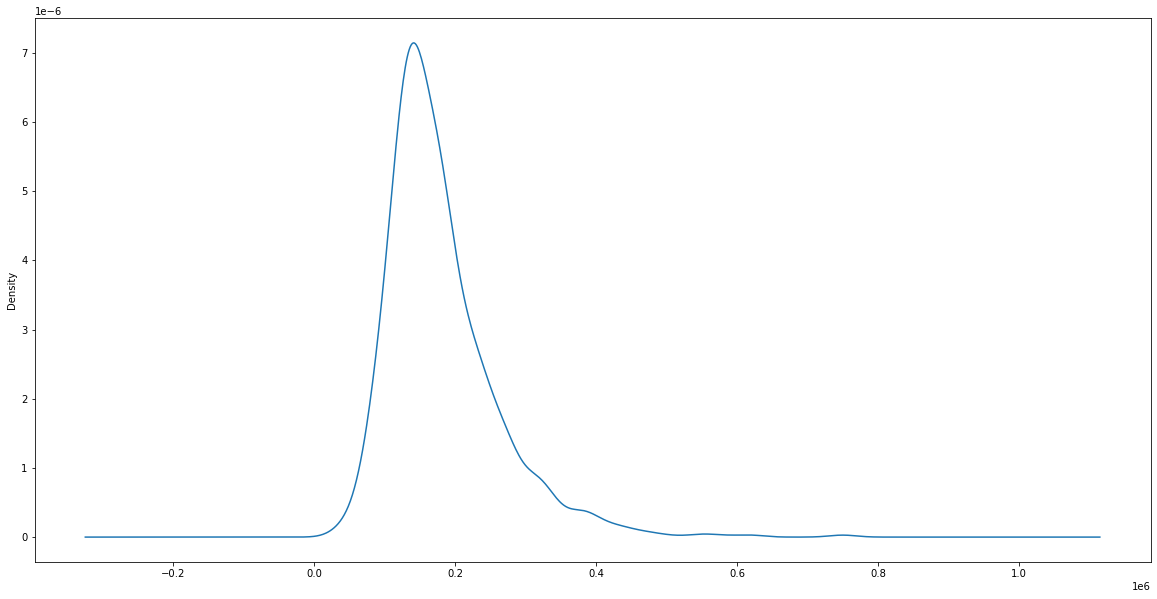

In [448]:
train_data['SalePrice'].plot(kind='kde', figsize = (20,10))

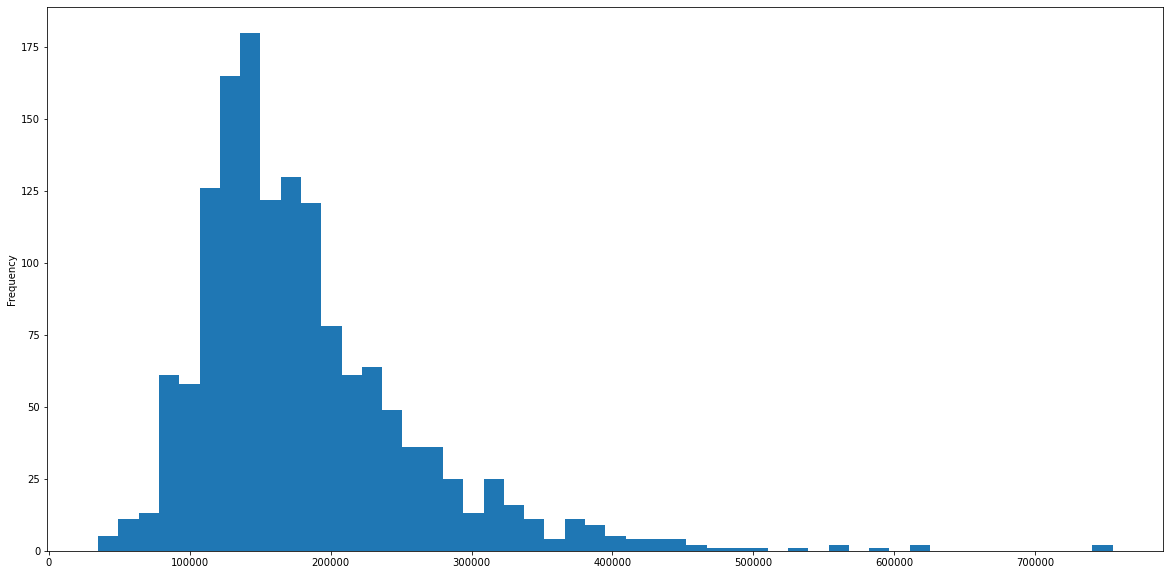

In [449]:
train_data['SalePrice'].plot(kind='hist', figsize = (20,10), bins =50)

rightskewed distribution / positive skewness
next step: categorical (nominal & ordinal) vs numerical features

In [450]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [451]:
corrMatrix = train_data.corr()
corrMatrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


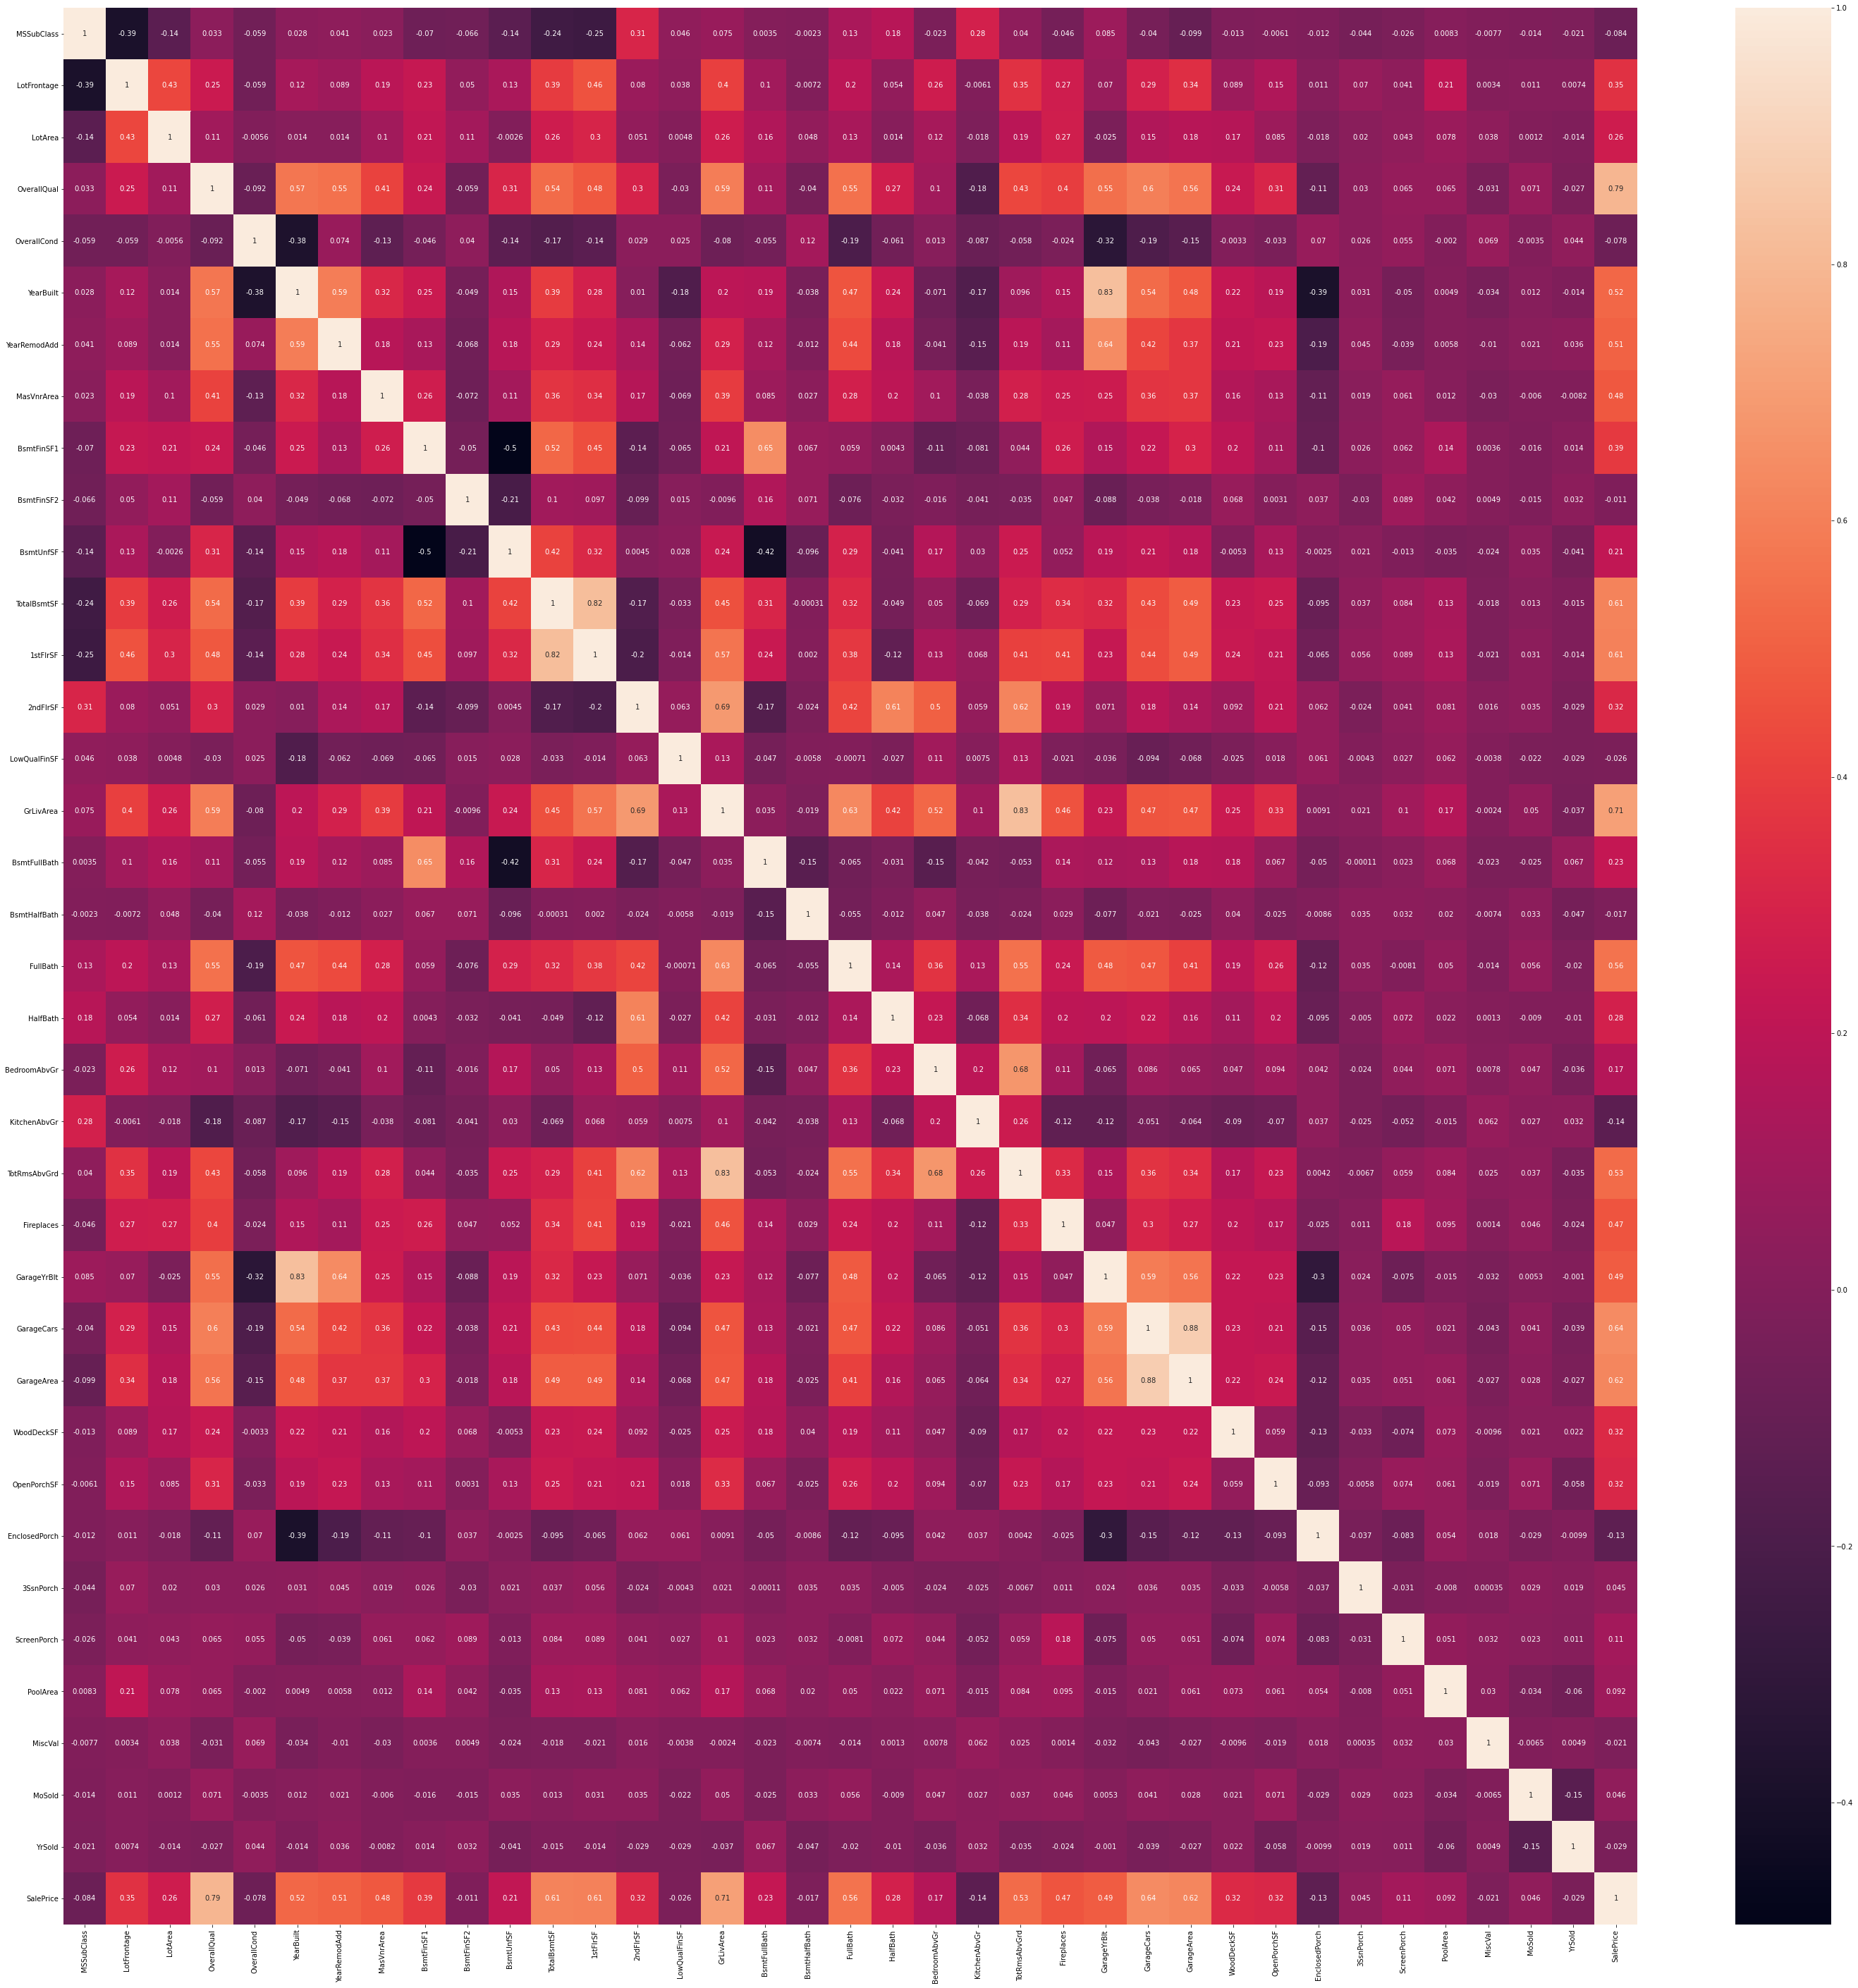

In [452]:
plt.subplots(figsize=(50,50))    
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [453]:
corrMatrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [454]:
categorical = train_data.select_dtypes(include=['object'])
categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [455]:
numerical = train_data.select_dtypes(include=['int','float']).dtypes
numerical

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

#categorical and numerical multicollinearity, find a way to identify
#nominal vs ordinal 

In [457]:
missing = np.sum(train_data.isnull())
missing[missing>0].sort_values(ascending = False)
#confirm the top 4 missing features are dropped

FireplaceQu     690
LotFrontage     259
GarageCond       81
GarageQual       81
GarageFinish     81
GarageYrBlt      81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [458]:
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('NE')
train_data['GarageType'] = train_data['GarageType'].fillna('NE')
train_data['GarageFinish'] = train_data['GarageFinish'].fillna('NE')
train_data['GarageQual'] = train_data['GarageQual'].fillna('NE')
train_data['GarageCond'] = train_data['GarageCond'].fillna('NE')
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna('NE')
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna('NE')
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna('NE')
train_data['BsmtCond'] = train_data['BsmtCond'].fillna('NE')
train_data['BsmtQual'] = train_data['BsmtQual'].fillna('NE')

In [459]:
missing = np.sum(train_data.isnull())
missing[missing>0].sort_values(ascending = False)
#after imputation

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

In [469]:
# train_data['GarageYrBlt'].fillna(train_data['YearBuilt'])
train_data.GarageYrBlt = np.where(train_data.GarageYrBlt.isnull(), train_data.YearBuilt, train_data.GarageYrBlt)
train_data.GarageYrBlt = train_data.GarageYrBlt.astype(int)

In [470]:
train_data['MasVnrArea'] = train_data['BsmtCond'].fillna(0)
train_data['MasVnrType'] = train_data['BsmtCond'].fillna('None')
train_data['Electrical'] = train_data['BsmtCond'].fillna('SBrkr')
#feel free to change the value
#train_data['MasVnrType'].value_counts()

## Fill in LotFrontage KNN

In [472]:
corrMatrix['LotFrontage'].sort_values(ascending = False)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFrontage, dtype: float64

In [473]:
s= np.sum(train_data.isnull())
s[s>0]

LotFrontage    259
dtype: int64

In [474]:
# train_data.LotFrontage
LotFrontage = train_data['LotFrontage'].tolist()
FlrSF = train_data['1stFlrSF'].tolist()
LotArea = train_data['LotArea'].tolist()
GrLivArea = train_data['GrLivArea'].tolist()
data = {'LotFrontage': LotFrontage, '1FlrSF':FlrSF, 'LotArea' :LotArea, 'GrLivArea': GrLivArea}

In [475]:
lot = pd.DataFrame(data)
lot

,LotFrontage,1FlrSF,LotArea,GrLivArea
0,65.0,856,8450,1710
1,80.0,1262,9600,1262
2,68.0,920,11250,1786
3,60.0,961,9550,1717
4,84.0,1145,14260,2198
...,...,...,...,...
1455,62.0,953,7917,1647
1456,85.0,2073,13175,2073
1457,66.0,1188,9042,2340
1458,68.0,1078,9717,1078


In [488]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(lot)
lot_imputed = pd.DataFrame(imputed, columns=lot.columns, index=range(1, 1461))

In [484]:
np.sum(lot_imputed.LotFrontage.isnull())

0

In [490]:
train_data['LotFrontage'] = lot_imputed['LotFrontage']

## No more missing values; all values are imputed accordingly

In [491]:
missing = np.sum(train_data.isnull())
missing[missing>0].sort_values(ascending = False)

Series([], dtype: int64)

In [492]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


## Explore categorical variables

In [496]:
categorical = train_data[['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']]
for i in range(0, len(categorical.columns)):
    print(categorical.iloc[:,i].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     2

In [493]:
categorical = train_data.select_dtypes(include=['object'])
categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

Nominal categorical variables that should be broken into different columns or have more complex dummification

-Kai
MSSubClass
MSZoning
Neighborhood
BldgType
LotConfig
HouseStyle
KitchenQual (ordinal)

-Thomas
RoofStyle
Exterior1st
Exterior2nd
ExterCond (ordinal)
ExterQual (ordinal)
MasVnrType
Condition1

-Chaitali
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
BsmtQual (ordinal)
GarageType
GarageQual (ordinal)

-Robert
Foundation
Electrical
Functional
SaleType
SaleCondition
HeatingQC (ordinal)
FireplaceQu (ordinal)

## Ignore Below

In [256]:
# housing_data['BsmtCond'] = housing_data['BsmtCond'].fillna('NE')
# housing_data['BsmtExposure'] = housing_data['BsmtExposure'].fillna('NE')
# housing_data['BsmtQual'] = housing_data['BsmtQual'].fillna('NE')
# housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].fillna('NE')
# housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].fillna('NE')
# housing_data['BsmtFullBath'] = housing_data['BsmtFullBath'].fillna(0.0)
# housing_data['BsmtHalfBath'] = housing_data['BsmtHalfBath'].fillna(0.0)
# housing_data['BsmtFinSF2'] = housing_data['BsmtFinSF2'].fillna(0)
# housing_data['BsmtUnfSF'] = housing_data['BsmtUnfSF'].fillna(0)
# housing_data['BsmtFinSF1'] = housing_data['BsmtFinSF1'].fillna(0)
# housing_data['TotalBsmtSF'] = housing_data['TotalBsmtSF'].fillna(0)

In [257]:
# housing_data['GarageFinish'] = housing_data['GarageFinish'].fillna('NE')
# housing_data['GarageQual'] = housing_data['GarageQual'].fillna('NE')
# housing_data['GarageCond'] = housing_data['GarageCond'].fillna('NE')
# housing_data['GarageType'] = housing_data['GarageType'].fillna('NE')
# housing_data['GarageCars'] = housing_data['GarageCars'].fillna(0)
# housing_data['GarageArea'] = housing_data['GarageArea'].fillna(0)
#missing values should be the same but not


In [258]:
output = housing_data['SalePrice']
housing_data = housing_data.drop('SalePrice', axis = 1)

In [272]:
s= np.sum(housing_data.isnull())
s[s>0]

MSZoning         4
LotFrontage    486
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      24
MasVnrArea      23
Electrical       1
KitchenQual      1
Functional       2
GarageYrBlt    159
SaleType         1
dtype: int64

In [266]:
categorical = list(categorical.columns)

In [270]:
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN
encoder = OrdinalEncoder()
imputer = KNN()
# create a list of categorical columns to iterate over
cat_cols = categorical

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(housing_data[columns])

#https://towardsdatascience.com/preprocessing-encode-and-knn-impute-all-categorical-features-fast-b05f50b4dfaa

In [274]:
encode_data = pd.DataFrame(np.round(imputer.fit_transform(housing_data)),columns = housing_data.columns)

Imputing row 1/2919 with 0 missing, elapsed time: 2.775
Imputing row 101/2919 with 1 missing, elapsed time: 2.787
Imputing row 201/2919 with 0 missing, elapsed time: 2.789
Imputing row 301/2919 with 0 missing, elapsed time: 2.791
Imputing row 401/2919 with 0 missing, elapsed time: 2.792
Imputing row 501/2919 with 0 missing, elapsed time: 2.793
Imputing row 601/2919 with 0 missing, elapsed time: 2.794
Imputing row 701/2919 with 0 missing, elapsed time: 2.796
Imputing row 801/2919 with 0 missing, elapsed time: 2.797
Imputing row 901/2919 with 1 missing, elapsed time: 2.799
Imputing row 1001/2919 with 0 missing, elapsed time: 2.801
Imputing row 1101/2919 with 0 missing, elapsed time: 2.802
Imputing row 1201/2919 with 0 missing, elapsed time: 2.803
Imputing row 1301/2919 with 1 missing, elapsed time: 2.805
Imputing row 1401/2919 with 0 missing, elapsed time: 2.806
Imputing row 1501/2919 with 1 missing, elapsed time: 2.807
Imputing row 1601/2919 with 0 missing, elapsed time: 2.808
Imputing 

In [279]:
encode_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,3.0,65.0,8450.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,1.0,0.0,2.0,2008.0,8.0,4.0
1,20.0,3.0,80.0,9600.0,1.0,1.0,3.0,3.0,0.0,2.0,...,0.0,0.0,3.0,4.0,1.0,0.0,5.0,2007.0,8.0,4.0
2,60.0,3.0,68.0,11250.0,1.0,1.0,0.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,1.0,0.0,9.0,2008.0,8.0,4.0
3,70.0,3.0,60.0,9550.0,1.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,4.0,1.0,0.0,2.0,2006.0,8.0,0.0
4,60.0,3.0,84.0,14260.0,1.0,1.0,0.0,3.0,0.0,2.0,...,0.0,0.0,3.0,4.0,1.0,0.0,12.0,2008.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160.0,4.0,21.0,1936.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,1.0,0.0,6.0,2006.0,8.0,4.0
2915,160.0,4.0,21.0,1894.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,1.0,0.0,4.0,2006.0,8.0,0.0
2916,20.0,3.0,160.0,20000.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,4.0,1.0,0.0,9.0,2006.0,8.0,0.0
2917,85.0,3.0,62.0,10441.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.0,3.0,2.0,3.0,700.0,7.0,2006.0,8.0,4.0


In [244]:
cat_variables = housing_data[['MasVnrType', 'MSZoning', 'Functional', 'Utilities', 'SaleType', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'Electrical']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Functional_Maj2,Functional_Min1,Functional_Min2,...,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [245]:
housing_data = housing_data.drop(['MasVnrType', 'MSZoning', 'Functional', 'Utilities', 'SaleType', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'Electrical'], axis=1)
housing_data = pd.concat([housing_data, cat_dummies], axis=1)
housing_data.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,60,65.0,8450,Pave,NE,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,1,0,0,0,0,0,1
1,20,80.0,9600,Pave,NE,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,Pave,NE,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,1,0,0,0,0,0,1
3,70,60.0,9550,Pave,NE,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,0,1,0,0,0,0,1
4,60,84.0,14260,Pave,NE,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,1,0,0,0,0,0,1


In [247]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(housing_data)

ValueError: could not convert string to float: 'Pave'

In [ ]:
knn
# housing_data['LotFrontage'] = housing_data['LotFrontage'].fillna('NE')
# housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna('NE') doesnt exist
# housing_data['MasVnrType'] = housing_data['MasVnrType'].fillna('NE')
# housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna('NE')
# housing_data['MSZoning'] = housing_data['MSZoning'].fillna('NE')
# housing_data['Functional'] = housing_data['Functional'].fillna('NE')
# housing_data['Utilities'] = housing_data['Utilities'].fillna('NE')
# housing_data['SaleType'] = housing_data['SaleType'].fillna('NE')
# housing_data['KitchenQual'] = housing_data['KitchenQual'].fillna('NE')
# housing_data['Exterior2nd'] = housing_data['Exterior2nd'].fillna('NE')
# housing_data['Exterior1st'] = housing_data['Exterior1st'].fillna('NE')
# housing_data['Electrical'] = housing_data['Electrical'].fillna('NE')


In [209]:
# g = housing_data['GarageYrBlt'].isnull()
g = housing_data[['BsmtCond']].isnull()

In [211]:
g.loc[g['BsmtCond'] == True].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412,  125,  133,  269,  318,  354,  387,  388,
             396,  397,  398,  400,  455,  580,  590,  606,  608,  660,  662,
             725,  728,  729,  730,  733,  756,  764,  927,  975,  992,  993,
            1030, 1038, 1064, 1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306,
            1343, 1344, 1364, 1431, 1444],
           dtype='int64')

In [213]:
j = housing_data[['BsmtFinType1']].isnull()

In [214]:
j.loc[j['BsmtFinType1'] == True].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412,  125,  133,  269,  318,  354,  387,  388,
             396,  397,  398,  400,  455,  590,  606,  608,  660,  662,  728,
             729,  730,  733,  756,  764,  927,  975,  992,  993, 1030, 1038,
            1087, 1092, 1104, 1118, 1139, 1242, 1303, 1306, 1343, 1344, 1364,
            1431, 1444],
           dtype='int64')

In [208]:
housing_data[housing_data['BsmtUnfSF'].isna()].BsmtCond


660    NaN
Name: BsmtCond, dtype: object

In [220]:
housing_data.iloc[590].BsmtCond

'TA'

In [230]:
housing_data[housing_data['GarageArea'].isnull()].GarageCond

1116    NaN
Name: GarageCond, dtype: object